 ### 웹 크롤링 방법
 - 동적페이지 : URL의 변경 없이 페이지의 내용이 변경 : json
 - 정적페이지 : URL이 변경 되면서 페이지의 내용이 변경 : HTML

In [1]:
import pandas as pd
import requests # 서버 쪽으로 데이터를 요청하고 가져오는 역함

### 웹 크롤링 절차
#### 1. 웹 서비스 분석 : 개발자 도구, URL을 알아내는 과정
#### 2. 서버에 데이터 요청 : request(URL) -> response(JSON)-딕셔너리나 리스트 포맷 타입은 Str
#### 3. JSON(str) -> Parsing -> dict, list 형식으로 만들기 -> DataFrame 변환

### 네이버 주가 데이터 수집
- 동적페이지 : JSON
- PC 페이지가 복잡하면 모바일 페이지에서 수집

### 1. 웹서비스 분석

In [37]:
page_size, page = 20, 1 # size가 60개로 제한됨 네이버가 그렇게 만듦..
url = f'https://m.stock.naver.com/api/index/KOSPI/price?pageSize={page_size}&page={page}'

### 2. 서버에 데이터 요청

In [30]:
response = requests.get(url)
response
# 성공 200 실패 400, 500

<Response [200]>

In [31]:
response.text[:200]

'[{"localTradedAt":"2022-02-21","closePrice":"2,728.02","compareToPreviousClosePrice":"-16.50","compareToPreviousPrice":{"code":"5","text":"하락","name":"FALLING"},"fluctuationsRatio":"-0.60","openPrice"'

### 3. 딕셔너리, 리스트 변환 및 데이터프레임 변환

In [32]:
datas = response.json()
type(datas)

list

In [33]:
kospi_df = pd.DataFrame(datas)
kospi_df.head()

,localTradedAt,closePrice,compareToPreviousClosePrice,compareToPreviousPrice,fluctuationsRatio,openPrice,highPrice,lowPrice
0,2022-02-21,"2,728.02",-16.50,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-0.60,"2,706.65","2,734.53","2,694.90"
1,2022-02-18,"2,744.52",0.43,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.02,"2,714.52","2,747.08","2,711.88"
2,2022-02-17,"2,744.09",14.41,"{'code': '2', 'text': '상승', 'name': 'RISING'}",0.53,"2,735.11","2,770.66","2,711.99"
3,2022-02-16,"2,729.68",53.14,"{'code': '2', 'text': '상승', 'name': 'RISING'}",1.99,"2,719.61","2,730.43","2,711.34"
4,2022-02-15,"2,676.54",-27.94,"{'code': '5', 'text': '하락', 'name': 'FALLING'}",-1.03,"2,712.45","2,716.45","2,665.47"


In [34]:
columns = ['localTradedAt', 'closePrice']
kospi_df = pd.DataFrame(datas)[columns]
kospi_df.head()

,localTradedAt,closePrice
0,2022-02-21,"2,728.02"
1,2022-02-18,"2,744.52"
2,2022-02-17,"2,744.09"
3,2022-02-16,"2,729.68"
4,2022-02-15,"2,676.54"


In [35]:
len(kospi_df)

20

### 4. 함수로 만들기

In [65]:
def stock_price(code="KOSPI", page_size=20, page=1): # 페이지가 낮을수록 가장 최근 데이터
    """
    params : code(KOSPI or KOSDAQ)
    """
    url = f'https://m.stock.naver.com/api/index/{code}/price?pageSize={page_size}&page={page}'
    response = requests.get(url)
    datas = response.json()
    return pd.DataFrame(datas)[['localTradedAt', 'closePrice']]

In [56]:
df = stock_price()
df.head()

,localTradedAt,closePrice
0,2022-02-21,"2,730.78"
1,2022-02-18,"2,744.52"
2,2022-02-17,"2,744.09"
3,2022-02-16,"2,729.68"
4,2022-02-15,"2,676.54"


In [58]:
df1 = stock_price("KOSDAQ")
df1.head()

,localTradedAt,closePrice
0,2022-02-21,880.56
1,2022-02-18,881.71
2,2022-02-17,874.22
3,2022-02-16,878.15
4,2022-02-15,839.92


### 5. 실습 원달러 환율 데이터 수집

In [64]:
def exchange_rate(code='FX_USDKRW', page_size=20, page=1):
    url = f'https://api.stock.naver.com/marketindex/exchange/{code}/prices?page={page}&pageSize={page_size}'
    response = requests.get(url)
    datas = response.json()
    return pd.DataFrame(datas)[['localTradedAt', 'closePrice']]

In [63]:
usd = exchange_rate()
usd.head()

,localTradedAt,closePrice
0,2022-01-19,"1,191.00"
1,2022-01-18,"1,192.50"
2,2022-01-17,"1,192.50"
3,2022-01-14,"1,190.00"
4,2022-01-13,"1,185.50"


### 6. 시각화 및 상관관계 분석

In [66]:
%config InlineBackend.figure_formats = {'png', 'retina'} # 해상도와 확장자

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

#### 1. 데이터 수집 : kosip, kosdqp, usd

In [70]:
kospi = stock_price()
kosdaq = stock_price("KOSDAQ")
usd = exchange_rate()

In [72]:
usd.head()

,localTradedAt,closePrice
0,2022-02-21,"1,194.60"
1,2022-02-18,"1,195.50"
2,2022-02-17,"1,197.50"
3,2022-02-16,"1,198.00"
4,2022-02-15,"1,197.50"


#### 2. 데이터 전처리 : str -> float

In [74]:
kospi.dtypes

localTradedAt    object
closePrice       object
dtype: object

In [75]:
kospi['closePrice'] = kospi['closePrice'].apply(lambda data: float(data.replace(',', '')))

In [77]:
kosdaq['closePrice'] = kosdaq['closePrice'].apply(lambda data: float(data.replace(',', '')))
usd['closePrice'] = usd['closePrice'].apply(lambda data: float(data.replace(',', '')))

In [76]:
kospi.dtypes

localTradedAt     object
closePrice       float64
dtype: object

In [78]:
kosdaq.dtypes

localTradedAt     object
closePrice       float64
dtype: object

In [79]:
usd.dtypes

localTradedAt     object
closePrice       float64
dtype: object

In [81]:
# lambda : 일회성 함수 : lambda parmse : return
def plus(num1, num2):
    return num1 + num2

def minus(num1, num2):
    return num1 - num2

def calc(func, num1, num2):
    return func(num1, num2)

In [82]:
calc(plus, 1,2) # plus 함수를 선언해야 함 -> 메모리 사용

3

In [83]:
calc(lambda num1, num2 : num1+num2, 1,2) # 1회 사용하고 선언된 함수 지워짐

3

In [84]:
# apply(func) : 모든 데이터에 func을 적용시킨 결과를 출력

In [89]:
df = kospi.copy()
df = df.rename(columns ={'localTradedAt':'date','closePrice':'kospi'})
df['kosdaq'] = kosdaq['closePrice']
df['usd'] = usd['closePrice']
df.head()

,date,kospi,kosdaq,usd
0,2022-02-21,2736.83,880.98,1194.6
1,2022-02-18,2744.52,881.71,1195.5
2,2022-02-17,2744.09,874.22,1197.5
3,2022-02-16,2729.68,878.15,1198.0
4,2022-02-15,2676.54,839.92,1197.5


In [90]:
df.dtypes

date       object
kospi     float64
kosdaq    float64
usd       float64
dtype: object

#### 3. 그래프 그리기

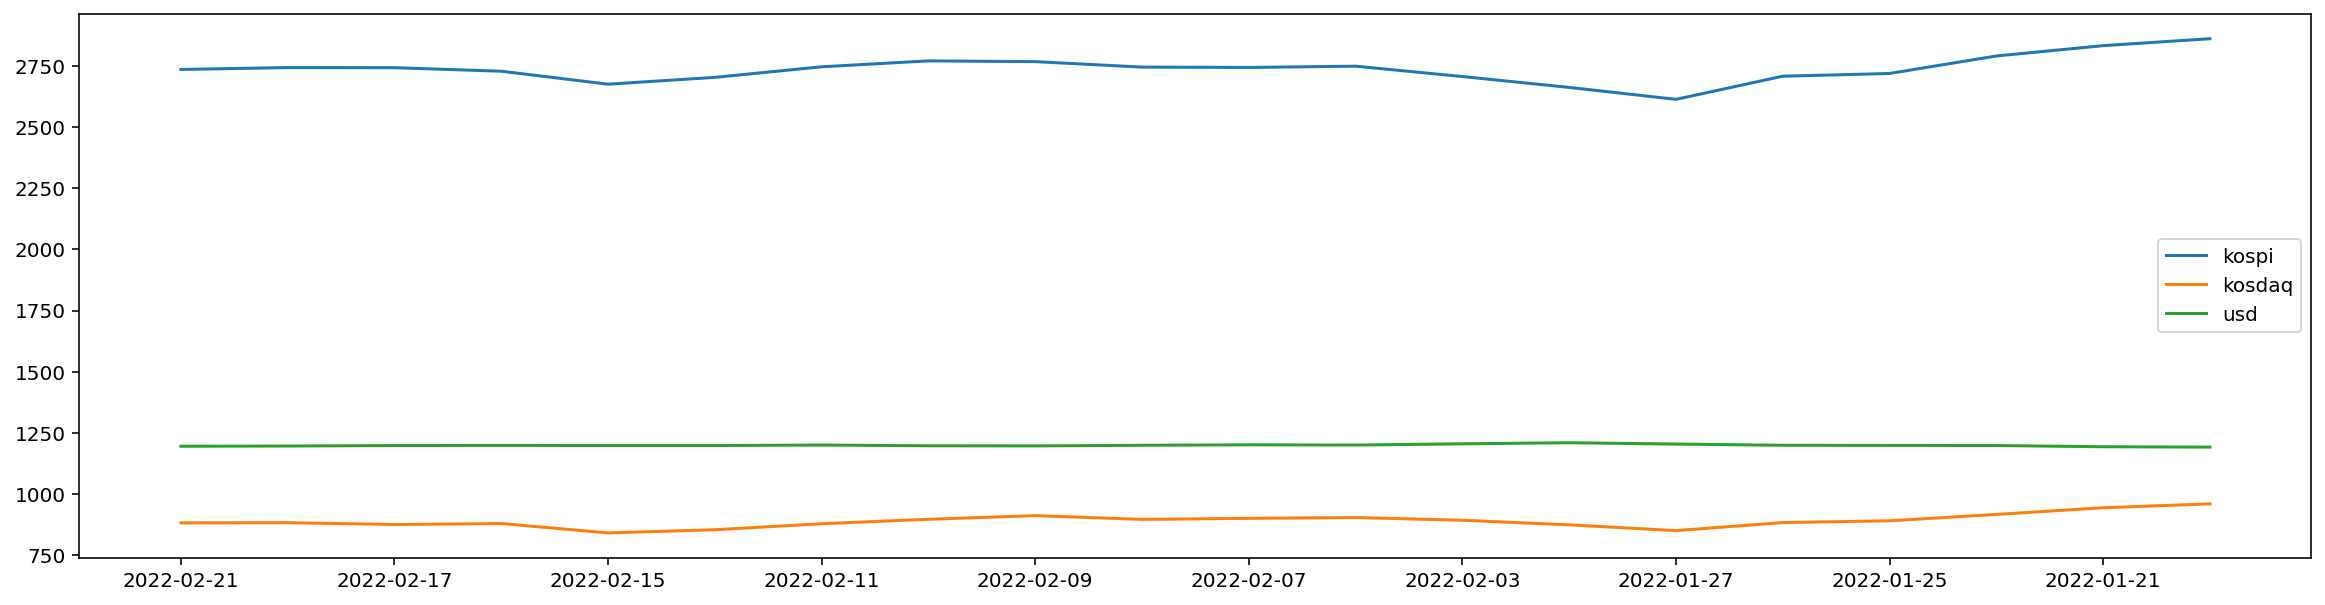

In [96]:
plt.figure(figsize=(20, 5))

#plt.plot(df['date'], df['kospi'], label='kospi')
#plt.plot(df['date'], df['kosdaq'], label='kosdaq')
#plt.plot(df['date'], df['usd'], label = 'usd')

for column in df.columns[1:]:
    plt.plot(df['date'], df[column], label=column)


plt.xticks(df['date'][::2])
plt.legend()
plt.show()

#### 4. 데이터스케일링 MinMaxScaler

In [ ]:
# z = (x - min(x)) / (max(x)-min(x))
# z : 0<=z<=1

In [97]:
from sklearn.preprocessing import minmax_scale

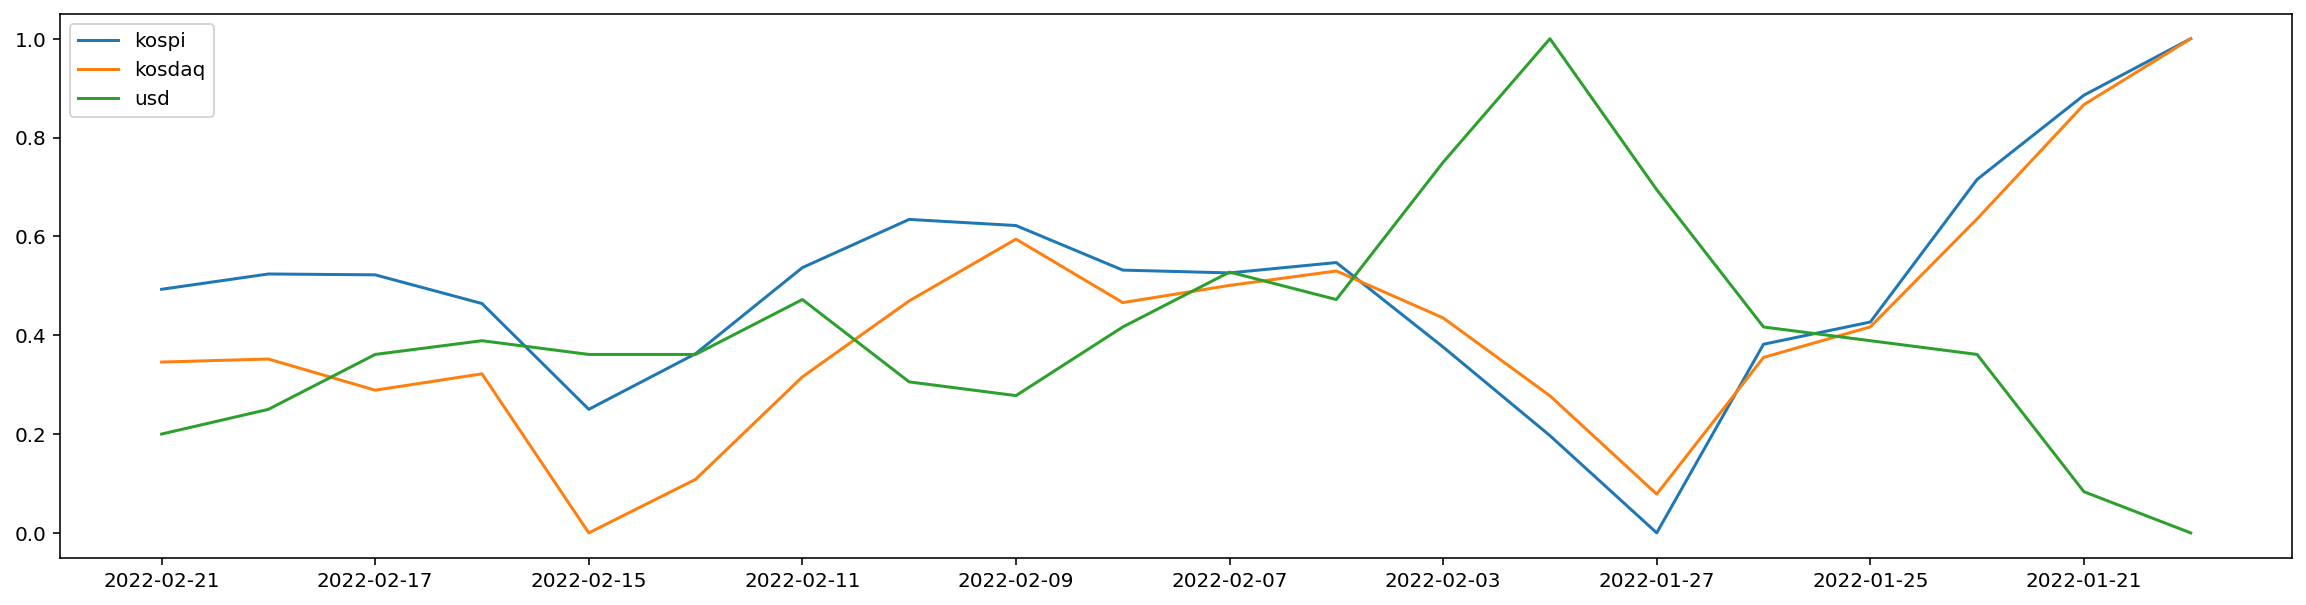

In [99]:
plt.figure(figsize=(20, 5))

#plt.plot(df['date'], df['kospi'], label='kospi')
#plt.plot(df['date'], df['kosdaq'], label='kosdaq')
#plt.plot(df['date'], df['usd'], label = 'usd')

for column in df.columns[1:]:
    plt.plot(df['date'], minmax_scale(df[column]), label=column)


plt.xticks(df['date'][::2])
plt.legend()
plt.show()

#### 5. 상관관계 분석

In [101]:
df.head()
# 상관계수 : 0과 가까울수록 두 데이터는 관계 x, 1과 가까울수록 두 데이터는 강한 양의 상관관계, -1과 가까울수록 두 데이터는 강한 음의 상관관계

,date,kospi,kosdaq,usd
0,2022-02-21,2736.83,880.98,1194.6
1,2022-02-18,2744.52,881.71,1195.5
2,2022-02-17,2744.09,874.22,1197.5
3,2022-02-16,2729.68,878.15,1198.0
4,2022-02-15,2676.54,839.92,1197.5


In [102]:
df[df.columns[1:]].corr()

,kospi,kosdaq,usd
kospi,1.000000,0.892551,-0.749616
kosdaq,0.892551,1.000000,-0.507550
usd,-0.749616,-0.507550,1.000000


In [103]:
# kospi와 kosdaq는 0.892 : 강한 양의 상관관계 a가 높으면 b 도 높다
# kospi-usd : -0.745 : 강한 음의 상관관계 a가 높으면 b는 떨어진다